In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from glob import glob
import cv2
import mediapipe as mp
from tensorflow.keras.optimizers import Adam,RMSprop,Adagrad
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [2]:
actions = np.array(['angry','cry','easy','fine','forgot','full','happy','hard','hello','like','love','me','miss','sad','scare','stand','you'])

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
len(label_map)

17

In [5]:
# Path for exported data, numpy arrays
train = os.path.join('dataset-noagu-split-npy\\train') 
test = os.path.join('dataset-noagu-split-npy\\test')
val = os.path.join('dataset-noagu-split-npy\\val')
# Actions that we try to detect
actions = np.array(['angry','cry','easy','fine','forgot','full','happy','hard','hello','like','love','me','miss','sad','scare','stand','you'])

In [6]:
train_ds, train_labels = [], []
for action in actions:
    for sequence in range(60):
        window = []
        for frame_num in range(30):
            if frame_num==0:
                res = np.zeros(258)
                window.append(res)
            else:
                res = np.load(os.path.join(train, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
        train_ds.append(window)
        train_labels.append(label_map[action])

In [7]:
val_ds, val_labels = [], []
for action in actions:
    for sequence in range(20):
        window = []
        for frame_num in range(30):
            if frame_num==0:
                res = np.zeros(258)
                window.append(res)
            else:
                res = np.load(os.path.join(val, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
        val_ds.append(window)
        val_labels.append(label_map[action])

In [8]:
train_labels = to_categorical(train_labels).astype(int)
val_labels = to_categorical(val_labels).astype(int)
# train_labels = to_categorical(train_labels, 17)
# val_labels = to_categorical(val_labels, 17)

In [9]:
train_ds=np.array(train_ds)
val_ds=np.array(val_ds)
train_labels=np.array(train_labels)
val_labels=np.array(val_labels)

In [10]:
# train_labels = to_categorical(train_labels, 17)
# val_labels = to_categorical(val_labels, 17)

In [11]:
print(len(train_labels))
#print(len(train_labels))

1020


In [12]:
print(len(train_ds))

1020


In [13]:
np.array(train_ds).shape

(1020, 30, 258)

In [14]:
np.array(train_labels).shape

(1020, 17)

In [15]:
np.array(val_ds).shape

(340, 30, 258)

In [16]:
np.array(val_labels).shape

(340, 17)

In [17]:
# sequences, labels = [], []
# window=[]
# for action in glob("dataset-noagu-split-npy\\train\\*"):
#     name_action=action.split("\\")[-1]
#     print(name_action)
#     for sequence in glob("dataset-noagu-split-npy\\train\\"+name_action+"\\*"):
#         window = []
#         num_sequence=sequence.split("\\")[-1]
#         #print(num_sequence)
#         for frame in glob("dataset-noagu-split-npy\\train\\"+name_action+"\\"+num_sequence+"\\*"):
#             #for num_frame in range(30):
#             frame=str(frame).split("\\")[-1].split(".")[0]
#             #print(frame)
#             if frame=='0':
#                 res = np.zeros((1, 1, 258))
#                 window.append(res)
#             else:
#                 res = np.load(os.path.join(train_ds, name_action, num_sequence, "{}.npy".format(frame)))
#                 window.append(res)
#                 #print(res)
# #                 if os.path.isfile("dataset\\"+name_action+"\\"+num_sequence+"\\"+str(frame)+".npy"):
# #                     #print("t")
# #                     res = np.load(os.path.join(DATA_PATH, name_action, num_sequence, "{}.npy".format(str(frame))))
# #                     window.append(res)
# #                 else:
# #                     #res = np.zeros((1, 1, 1662))
# #                     window.append(res)
#         sequences.append(window)
#         labels.append(label_map[name_action])

In [18]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
check_point = tf.keras.callbacks.ModelCheckpoint('.\\weight\\test.h5')                                 

In [19]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [20]:
#model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#history = model.fit(train_ds,validation_data=val_ds, epochs=10, callbacks=[tb_callback])
history = model.fit(train_ds,train_labels, epochs=500,batch_size=32,validation_data=(val_ds,val_labels), callbacks=[early_stop,check_point])

Epoch 1/500
32/32 [==============================] - 4s 43ms/step - loss: 2.8211 - accuracy: 0.0676 - val_loss: 2.7721 - val_accuracy: 0.1176
Epoch 2/500
32/32 [==============================] - 1s 33ms/step - loss: 2.5974 - accuracy: 0.1510 - val_loss: 2.3224 - val_accuracy: 0.2118
Epoch 3/500
32/32 [==============================] - 1s 35ms/step - loss: 2.1431 - accuracy: 0.2471 - val_loss: 2.0690 - val_accuracy: 0.2529
Epoch 4/500
32/32 [==============================] - 1s 39ms/step - loss: 2.0331 - accuracy: 0.2735 - val_loss: 2.0172 - val_accuracy: 0.2941
Epoch 5/500
32/32 [==============================] - 1s 35ms/step - loss: 1.7430 - accuracy: 0.3657 - val_loss: 1.7701 - val_accuracy: 0.3235
Epoch 6/500
32/32 [==============================] - 1s 37ms/step - loss: 1.5388 - accuracy: 0.4314 - val_loss: 1.4654 - val_accuracy: 0.4676
Epoch 7/500
32/32 [==============================] - 1s 35ms/step - loss: 1.3120 - accuracy: 0.5010 - val_loss: 1.4586 - val_accuracy: 0.4324
Epoch 

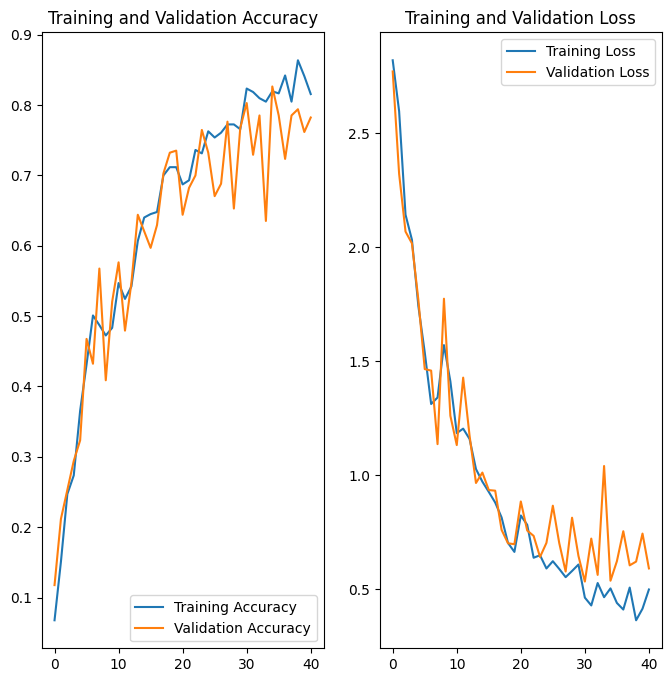

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

DenseNet_model_history = pd.DataFrame(history.history)
DenseNet_model_history['epoch'] = history.epoch
epoch = DenseNet_model_history.shape[0]

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
test_ds, test_labels = [], []
for action in actions:
    for sequence in range(20):
        window = []
        for frame_num in range(30):
            if frame_num==0:
                res = np.zeros(258)
                window.append(res)
            else:
                res = np.load(os.path.join(test, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
        test_ds.append(window)
        test_labels.append(label_map[action])

In [24]:
test_labels = to_categorical(test_labels).astype(int)

In [25]:
test_ds=np.array(test_ds)
test_labels=np.array(test_labels)

In [26]:
new_model = tf.keras.models.load_model('.\\weight\\test.h5')

In [27]:
xhat=test_ds
yhat=new_model.predict(xhat)

11/11 [==============================] - 0s 9ms/step


In [28]:
result = new_model.evaluate(test_ds,test_labels)

11/11 [==============================] - 0s 9ms/step - loss: 0.5604 - accuracy: 0.7618


In [29]:
result

[0.5603910684585571, 0.7617647051811218]

In [30]:
# print(yhat.shape)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(test_labels,axis=1), np.argmax(yhat, axis=1))

In [32]:
# print(len(np.argmax(yhat , axis=1)))

In [33]:
# len(np.argmax(test_labels,axis=1))

In [34]:
# len(test_labels)

In [35]:
total_per_class = np.sum(cm, axis=1)
percent_cm = np.zeros_like(cm, dtype=np.float64)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        percent_cm[i,j] = cm[i,j] / total_per_class[i]

<AxesSubplot: title={'center': 'All fold confusion matrix of the multi-class classification\n\nModel LSTM\n\nMean Accuracy is 0.76'}>

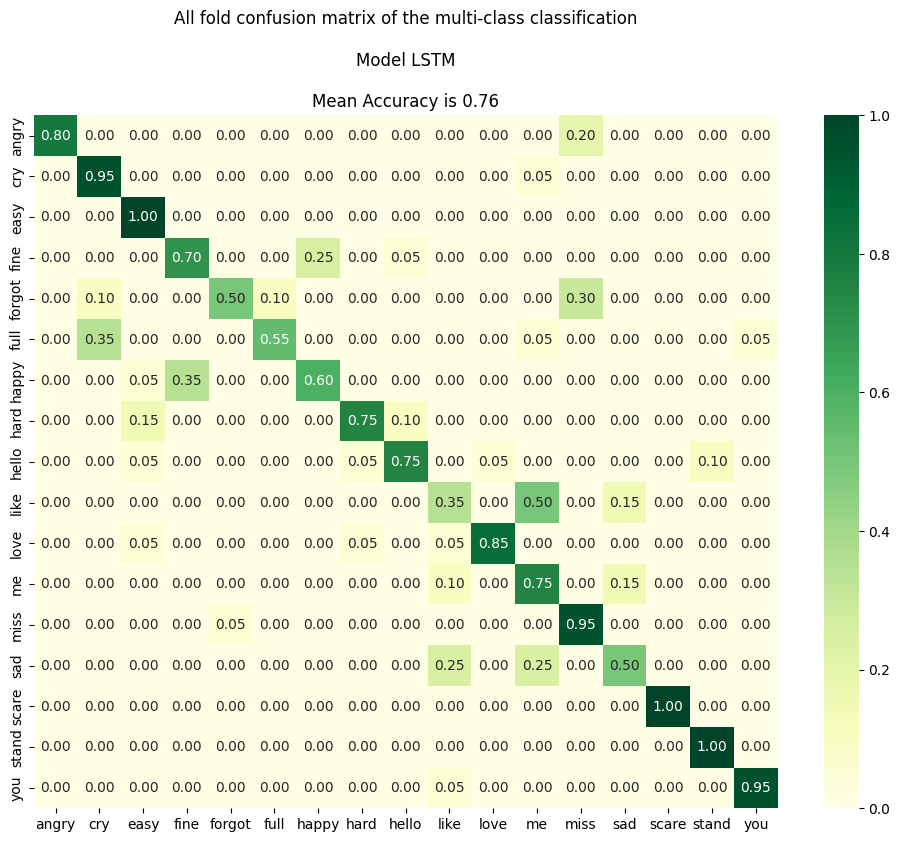

In [36]:
import seaborn as sns
import pandas as pd
df_cm = pd.DataFrame(percent_cm, index =actions,columns =actions )
plt.figure(figsize = (12,9))
plt.title('All fold confusion matrix of the multi-class classification\n\nModel LSTM\n\nMean Accuracy is {:.2f}'.format((np.mean(result[1]))))
sns.heatmap(df_cm, annot=True,cmap="YlGn",fmt=".2f")

In [37]:
from sklearn.metrics import accuracy_score, classification_report 

print(classification_report(np.argmax(test_labels,axis=1),np.argmax(yhat, axis=1), target_names=actions))

              precision    recall  f1-score   support

       angry       1.00      0.80      0.89        20
         cry       0.68      0.95      0.79        20
        easy       0.77      1.00      0.87        20
        fine       0.67      0.70      0.68        20
      forgot       0.91      0.50      0.65        20
        full       0.85      0.55      0.67        20
       happy       0.71      0.60      0.65        20
        hard       0.88      0.75      0.81        20
       hello       0.83      0.75      0.79        20
        like       0.44      0.35      0.39        20
        love       0.94      0.85      0.89        20
          me       0.47      0.75      0.58        20
        miss       0.66      0.95      0.78        20
         sad       0.62      0.50      0.56        20
       scare       1.00      1.00      1.00        20
       stand       0.91      1.00      0.95        20
         you       0.95      0.95      0.95        20

    accuracy              

In [38]:
# print('Percentage confusion matrix:')
# print(percent_cm)

In [39]:
# actions = np.array(['angry','cry','easy','fine','forgot','full','happy','hard','hello','like','love','me','miss','sad','scare','stand','you'])
# plt.subplots(figsize=(20,20))
# plt.imshow(percent_cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.colorbar()
# tick_marks = np.arange(len(actions))
# plt.xticks(tick_marks,actions,rotation=90)
# plt.yticks(tick_marks, actions)

# total_per_class = np.sum(cm, axis=1)
# percent_cm = np.zeros_like(cm, dtype=np.float64)
# thresh = percent_cm.max() / 2.
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         percent_cm[i,j] = cm[i,j] / total_per_class[i] * 100
#         plt.text(i,j ,format(percent_cm[i,j],'.0f') + '%')
        
        
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.title('Confusion Matrix')
# plt.show()

In [54]:
# print('Confusion matrix:')
# print(cm)